In [120]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split

Funkcja zaakceptuje następujące parametry:

max_iterations: Maksymalna liczba iteracji do uruchomienia

threshold: Zatrzymaj, jeśli różnica w wartościach funkcji między dwiema kolejnymi iteracjami spadnie poniżej tego progu

w_init: Punkt początkowy, od którego należy rozpocząć opadanie gradientu

obj_func: Odwołanie do funkcji obliczającej funkcję celu

grad_func: Odwołanie do funkcji, która oblicza gradient funkcji

extra_param: Dodatkowe parametry (w razie potrzeby) dla obj_func i grad_func

learning_rate: Rozmiar kroku dla opadania gradientu. Powinno być w [0,1]

momentum: Pęd do wykorzystania. Powinno być w [0,1]

In [121]:
def gradient_descent(max_iterations,threshold,w_init,
                     obj_func,grad_func,extra_param = [],
                     learning_rate=6.65,momentum=8.8):
    w = w_init
    w_history = w
    f_history = obj_func(w,extra_param)
    delta_w = np.zeros(w.shape)
    i = 0
    # pochodna
    diff = 1.0e10
    while  i<max_iterations and diff>threshold:
        delta_w = -learning_rate*grad_func(w,extra_param) + momentum*delta_w
        w = w+delta_w

        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w,extra_param)))
        
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
    
    return w_history,f_history

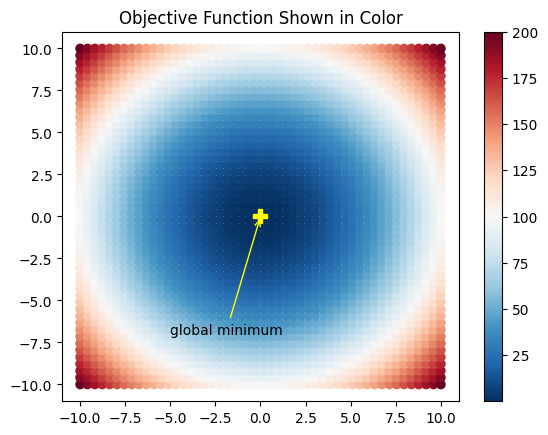

In [122]:
def visualize_fw():
    xcoord = np.linspace(-10.0,10.0,50)
    ycoord = np.linspace(-10.0,10.0,50)
    w1,w2 = np.meshgrid(xcoord,ycoord)
    pts = np.vstack((w1.flatten(),w2.flatten()))
    
    # All 2D points on the grid
    pts = pts.transpose()
    
    # Function value at each point
    f_vals = np.sum(pts*pts,axis=1)
    function_plot(pts,f_vals)
    plt.title('Objective Function Shown in Color')
    plt.show()
    return pts,f_vals

# Helper function to annotate a single point
def annotate_pt(text,xy,xytext,color):
    plt.plot(xy[0],xy[1],marker='P',markersize=10,c=color)
    plt.annotate(text,xy=xy,xytext=xytext,
                 # color=color,
                 arrowprops=dict(arrowstyle="->",
                 color = color,
                 connectionstyle='arc3'))

# Plot the function
# Pts are 2D points and f_val is the corresponding function value
def function_plot(pts,f_val):
    f_plot = plt.scatter(pts[:,0],pts[:,1],
                         c=f_val,vmin=min(f_val),vmax=max(f_val),
                         cmap='RdBu_r')
    plt.colorbar(f_plot)
    # Show the optimal point
    annotate_pt('global minimum',(0,0),(-5,-7),'yellow')    

pts,f_vals = visualize_fw()

In [123]:

def f(w,extra=[]):
    return np.sum(w*w)

def grad(w,extra=[]):
    return 2*w

def visualize_learning(w_history):  
    

    function_plot(pts,f_vals)

    plt.plot(w_history[:,0],w_history[:,1],marker='o',c='magenta') 

    annotate_pt('minimum found',
                (w_history[-1,0],w_history[-1,1]),
                (-1,7),'green')
    iter = w_history.shape[0]
    for w,i in zip(w_history,range(iter-1)):

        plt.annotate("",
                    xy=w, xycoords='data',
                    xytext=w_history[i+1,:], textcoords='data',
                    arrowprops=dict(arrowstyle='<-',
                            connectionstyle='angle3'))     
    
def solve_fw():
    # Setting up
    rand = np.random.RandomState(19)
    w_init = rand.uniform(-10,10,2)
    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
    learning_rates = [0.05,0.2,0.5,0.8]
    momentum = [0,0.5,0.9]
    ind = 1
    
    # Iteration through all possible parameter combinations
    for alpha in momentum:
        for eta,col in zip(learning_rates,[0,1,2,3]):
            plt.subplot(3,4,ind)        
            w_history,f_history = gradient_descent(5,-1,w_init, f,grad,[],eta,alpha)
            
            visualize_learning(w_history)
            ind = ind+1
            plt.text(-9, 12,'Learning Rate = '+str(eta),fontsize=13)
            if col==1:
                plt.text(10,15,'momentum = ' + str(alpha),fontsize=20)

    fig.subplots_adjust(hspace=0.5, wspace=.3)
    plt.show()


C:\Users\mhalama\AppData\Local\Temp\ipykernel_13672\2383496407.py:38: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,4,ind)


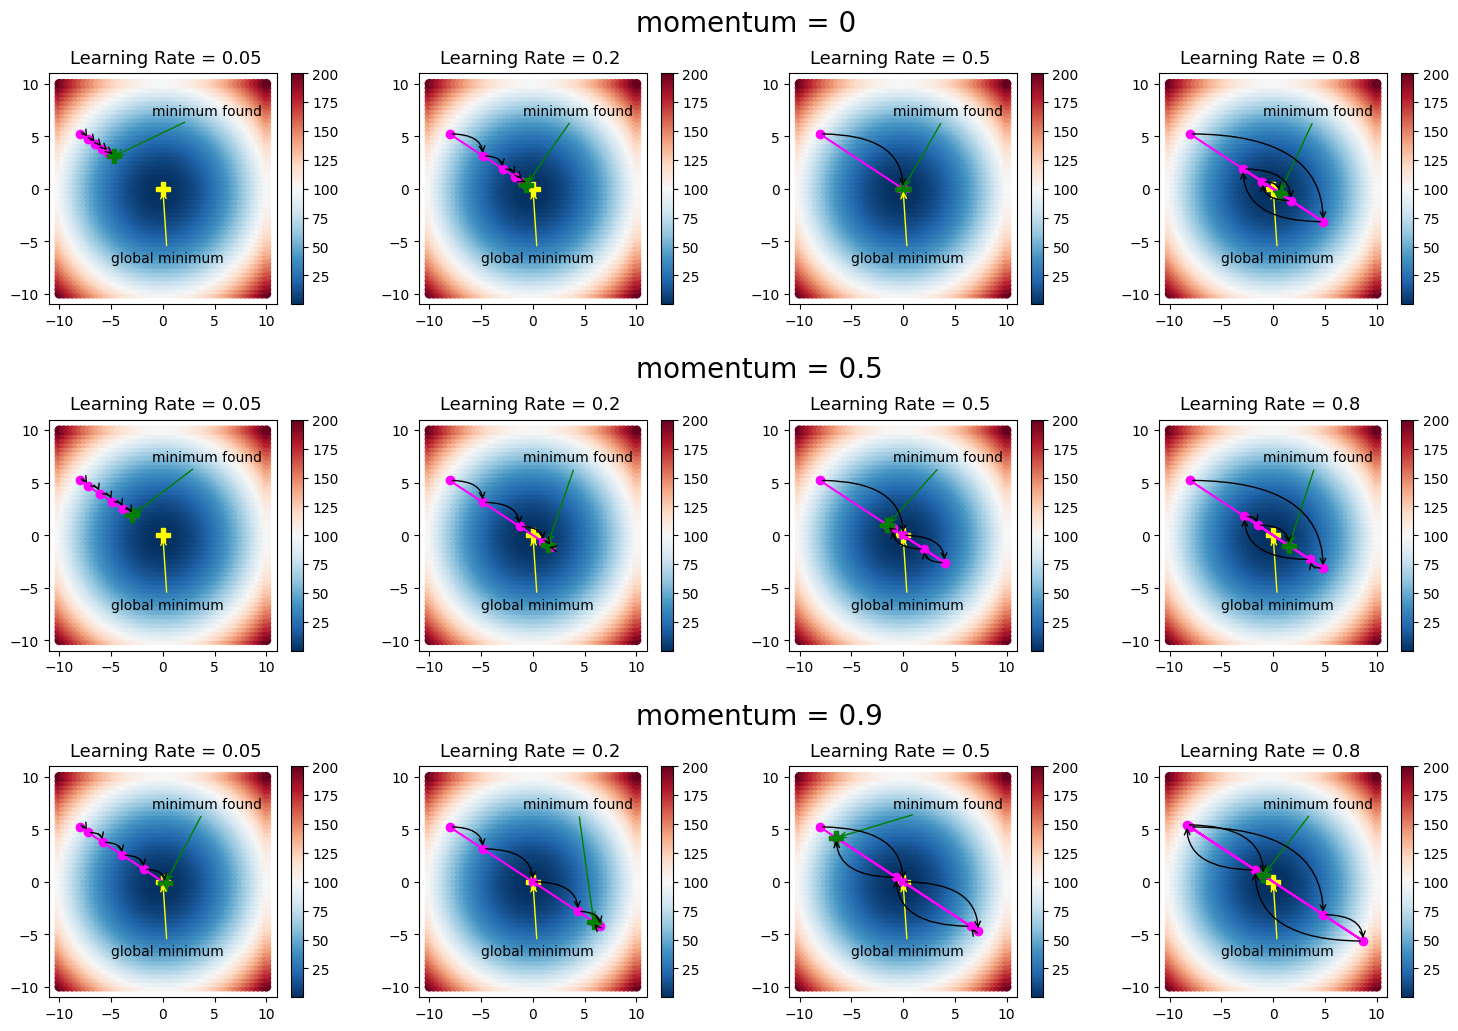

In [124]:
solve_fw()

In [132]:
def f(w,extra=[]):
    return np.sum(w*w)

def grad(w,extra=[]):
    return 2*w

def visualize_learning(w_history):  
    

    function_plot(pts,f_vals)

    plt.plot(w_history[:,0],w_history[:,1],marker='o',c='magenta') 

    annotate_pt('minimum found',
                (w_history[-1,0],w_history[-1,1]),
                (-1,7),'green')
    iter = w_history.shape[0]
    for w,i in zip(w_history,range(iter-1)):

        plt.annotate("",
                    xy=w, xycoords='data',
                    xytext=w_history[i+1,:], textcoords='data',
                    arrowprops=dict(arrowstyle='<-',
                            connectionstyle='angle3'))     
    
def solve_fw():
    # Setting up
    rand = np.random.RandomState(19)
    w_init = rand.uniform(-10,10,2)
    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
    learning_rates = [0.0001,0.002,0.05,0.99]
    momentum = [0,0.5,0.9]
    ind = 1
    
    # Iteration through all possible parameter combinations
    for alpha in momentum:
        for eta,col in zip(learning_rates,[0,1,2,3]):
            plt.subplot(3,4,ind)        
            w_history,f_history = gradient_descent(5,-1,w_init, f,grad,[],eta,alpha)
            
            visualize_learning(w_history)
            ind = ind+1
            plt.text(-9, 12,'Learning Rate = '+str(eta),fontsize=13)
            if col==1:
                plt.text(10,15,'momentum = ' + str(alpha),fontsize=20)

    fig.subplots_adjust(hspace=0.5, wspace=.3)
    plt.show()

C:\Users\mhalama\AppData\Local\Temp\ipykernel_13672\4066015340.py:38: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,4,ind)


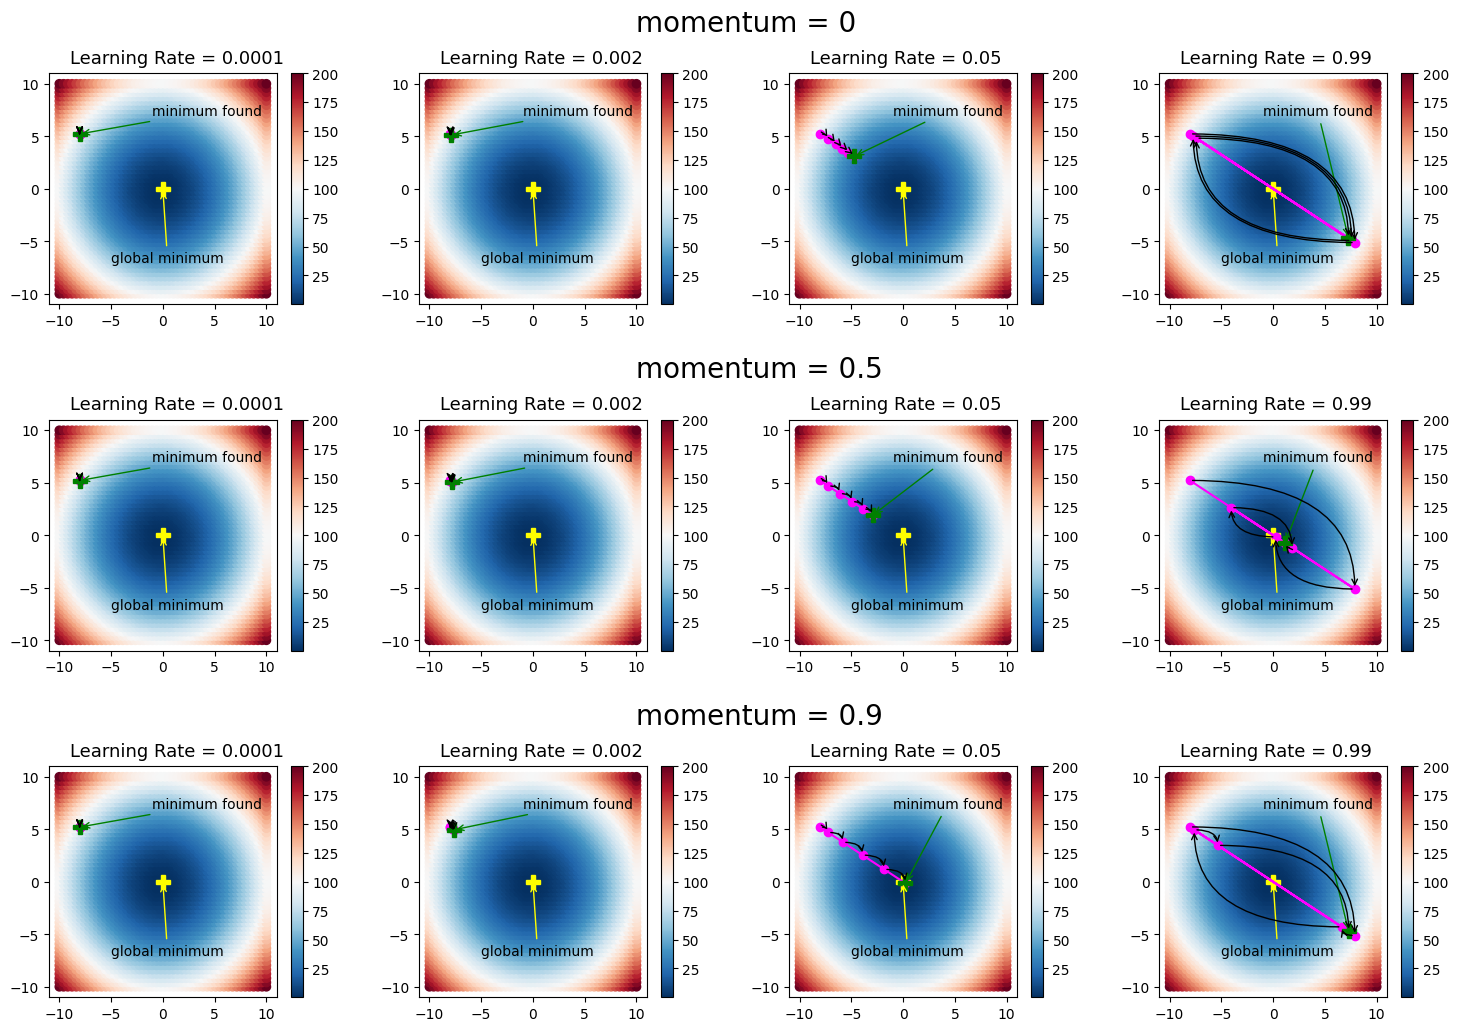

In [133]:
solve_fw()